<h1 align="center">Data Analysis using Numpy, Matplotlib, and Pandas in Python</h1>
<br/><br/>
![title](resources/python.png)

## Importing the libraries needed

Here we are importing: 
1. Numpy for creating array and numerical calculations
2. Matplotlib for plotting 
3. Seaborn for beautifying the plot
4. Pandas for data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import warnings

# Uncomment the code below to check the available plotting style
#print(plt.style.available)

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("fivethirtyeight")
seaborn.set()

## Read data from excel file

The file is included in this porject, you could find it under resources directory.

In [14]:
sales_data2017 = pd.read_excel("./resources/sales_data.xlsx")

## Display the first five rows of sales data

No matter how many rows your data have, with head method, only the first five rows that will be shown.

In [15]:
sales_data2017.head()

,item,sales_name,qty,unit_price,amount,transaction_date,due_date
0,Laptop,Sales A,20,1500,30000,2017-04-07,2017-05-07
1,PC,Sales B,30,2000,60000,2018-02-02,2018-03-04
2,Mouse,Sales C,10,120,1200,2017-12-30,2018-01-29
3,Monitor,Sales A,40,400,16000,2017-11-02,2017-12-02


## Display the last five rows of sales data

Since the sales data contains only four rows, therefore there is no difference in the output between the first and the last five rows.

In [16]:
sales_data2017.tail()

,item,sales_name,qty,unit_price,amount,transaction_date,due_date
0,Laptop,Sales A,20,1500,30000,2017-04-07,2017-05-07
1,PC,Sales B,30,2000,60000,2018-02-02,2018-03-04
2,Mouse,Sales C,10,120,1200,2017-12-30,2018-01-29
3,Monitor,Sales A,40,400,16000,2017-11-02,2017-12-02


## Getting information about the data types of the columns

In [17]:
sales_data2017.dtypes

item                        object
sales_name                  object
qty                          int64
unit_price                   int64
amount                       int64
transaction_date    datetime64[ns]
due_date            datetime64[ns]
dtype: object

## Check for missing values of each column

In [39]:
sales_data2017.isnull().any()

item                False
sales_name          False
qty                 False
unit_price          False
amount              False
transaction_date    False
due_date            False
overdue             False
dtype: bool

## Summary statistics of sales data

In [19]:
sales_data2017.describe()

,qty,unit_price,amount
count,4.000000,4.000000,4.000000
mean,25.000000,1005.000000,26800.000000
std,12.909944,891.496869,25063.120317
min,10.000000,120.000000,1200.000000
25%,17.500000,330.000000,12300.000000
50%,25.000000,950.000000,23000.000000
75%,32.500000,1625.000000,37500.000000
max,40.000000,2000.000000,60000.000000


## Adding new column and its values

Assuming the transactions in sales data are still outstanding and we'd like to calculate the overdue (in days) of each transaction, the checkOutstanding method below is the solution to get it. The method has one argument i.e. data and in our case is sales_data2017.

In [20]:
from datetime import date

def checkOutstanding(data):
    current_date = date.today()
    due_date = data['due_date']
    overdue = current_date - due_date
    data["overdue"] = overdue
    return data.loc[data.index[0:], ["item","overdue"]]

checkOutstanding(sales_data2017)

,item,overdue
0,Laptop,343 days
1,PC,42 days
2,Mouse,76 days
3,Monitor,134 days


## Current table structure after adding overdue column

In [21]:
sales_data2017.dtypes

item                         object
sales_name                   object
qty                           int64
unit_price                    int64
amount                        int64
transaction_date     datetime64[ns]
due_date             datetime64[ns]
overdue             timedelta64[ns]
dtype: object

## Create a method to convert timedata to int

In [22]:
def convertTimeDataToInt(d):
    count = 0;
    data = list(d['overdue'])
    for i in data:
        d['overdue'][count] = i.days
        count +=1
    return d
            
convertTimeDataToInt(sales_data2017)


,item,sales_name,qty,unit_price,amount,transaction_date,due_date,overdue
0,Laptop,Sales A,20,1500,30000,2017-04-07,2017-05-07,343
1,PC,Sales B,30,2000,60000,2018-02-02,2018-03-04,42
2,Mouse,Sales C,10,120,1200,2017-12-30,2018-01-29,76
3,Monitor,Sales A,40,400,16000,2017-11-02,2017-12-02,134


## Plotting with matplotlib
<h3>Plot the total sales as of 31 December 2017</h3>

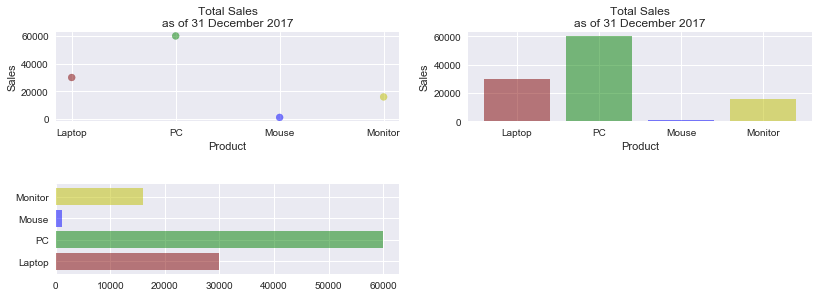

In [40]:
item = sales_data2017['item']
name = sales_data2017['sales_name']
sales = sales_data2017['amount']
overdue = sales_data2017['overdue']
colors = ['maroon','g','b','y']

def scatterPlot(data): 
    plt.title("Total Sales\nas of 31 December 2017")
    plt.xlabel("Product")
    plt.ylabel("Sales")
    plt.subplot(221)
    return plt.scatter(item, sales, color =colors, alpha=0.5)

def barCharPlot(data):
    plt.title("Total Sales\nas of 31 December 2017")
    plt.xlabel("Product")
    plt.ylabel("Sales")
    plt.subplot(222)
    return plt.bar(item, sales, color=colors, alpha=0.5)

def barhPlot(data):
    plt.title("Total Sales\nas of 31 December 2017")
    plt.xlabel("Product")
    plt.ylabel("Sales")
    plt.subplot(223)
    return plt.barh(item, sales, color=colors, alpha=0.5)

scatterPlot(sales_data2017)
barCharPlot(sales_data2017)
barhPlot(sales_data2017)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.75, right=2.5, hspace=0.70, wspace=0.2)

Notes: The idea of the plots above is just to show the matplotlib's subplot feature, they exactly containing the same data.

### Plot the outstanding transactions
<h4>Sales and Overdue (in days)</h4>

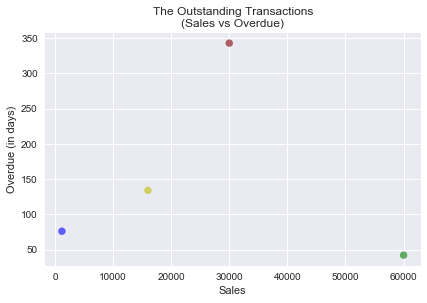

In [16]:
def scatterPlot(data): 
    plt.title("The Outstanding Transactions\n(Sales vs Overdue)")
    plt.xlabel("Sales")
    plt.ylabel("Overdue (in days)")
    return plt.scatter(sales, overdue, color =colors, alpha=0.6)

scatterPlot(sales_data2017)

#### Overdue (in days) by Sales Name

<BarContainer object of 4 artists>

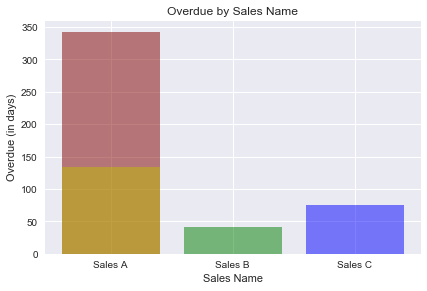

In [28]:
def barCharPlot(data):
    plt.title("Overdue by Sales Name")
    plt.xlabel("Sales Name")
    plt.ylabel("Overdue (in days)")
    return plt.bar(name, overdue, color=colors, alpha=0.5)

barCharPlot(sales_data2017)

#### Total Sales by Sales Name

<BarContainer object of 4 artists>

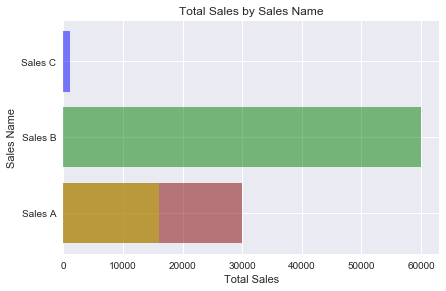

In [15]:
def barhPlot(data):
    plt.title("Total Sales by Sales Name")
    plt.xlabel("Total Sales")
    plt.ylabel("Sales Name")
    return plt.barh(name, sales, color=colors, alpha=0.5)

barhPlot(sales_data2017)

<h1 align="center">Classification using Scikit-Learn</h1>

## Read new data from excel file

The file is included in this porject, you could find it under resources directory.

In [25]:
data = pd.read_excel("./resources/sales_data_new.xlsx")

## Getting information about the new sales data
<h3>The number of dimension</h3>

In [49]:
data.ndim

2

### Data Shape

The pandas axis is slightly different from numpy, in pandas, the axis 0  of two dimensional array belongs to row and axis 1 belongs to column.

In [48]:
data.shape

(300000, 9)

The new sales data contain of 300.000 records (rows) and 8 columns

###  Data types of the columns

In [27]:
data.dtypes

item                         int64
Region                       int64
sales_name                  object
qty                          int64
unit_price                   int64
amount                       int64
transaction_date    datetime64[ns]
due_date            datetime64[ns]
dtype: object

### Check for missing values of each column 

In [50]:
data.isnull().any()

item                False
Region              False
sales_name          False
qty                 False
unit_price          False
amount              False
transaction_date    False
due_date            False
overdue             False
dtype: bool

## Adding overdue data as well as displaying overdue data for the first five rows only

In [44]:
print(checkOutstanding(data).head())

   item overdue
0     4 80 days
1     1 52 days
2     4 65 days
3     4 52 days
4     1 45 days
